# SENTIMENT ANALYSIS OF TWEETS 

In [2]:
import tweepy
import pandas as pd
import numpy as np

In [3]:
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import os
import sys
from tweepy import OAuthHandler
from tweepy import API
from tweepy import Cursor

In [4]:
def twitter_initialize():
    """ Initialize Twitter Authentication & set up API client """
    try:
        consumer_key = os.environ['TWITTER_CONSUMER_KEY']
        consumer_secret = os.environ['TWITTER_CONSUMER_SECRET']
        access_token = os.environ['TWITTER_ACCESS_TOKEN']
        access_secret = os.environ['TWITTER_ACCESS_SECRET']
    except KeyError:
        sys.stderr.write("TWITTER_* environment variables not set\n")
        sys.exit(1)
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)
    
    ## Setup twitter API Client ##
    client = API(auth, wait_on_rate_limit=True)
    return client

In [5]:
api = twitter_initialize()

# Just with 30 tweets

In [7]:
query = 'FamiliesBelongTogether OR immigration OR ChildrenInCages OR KeepFamiliesTogether'
number = 10000
result = api.search(lang="en", q=query + " -rt", count = number, since='2017-06-20', until='2017-06-24')
#fname = "tweetssearch.jsonl"

In [6]:
query = 'FamiliesBelongTogether OR immigration OR ChildrenInCages OR KeepFamiliesTogether'

In [7]:
fname1 = "tweetssearchjun2024.jsonl"

In [12]:
with open(fname1, 'w') as f:
    for tweet in Cursor(api.search, q=query + " -rt", include_retweets=False).items(10000):
        f.write(json.dumps(tweet._json)+"\n")

In [19]:
fname2 = "tweetssearchjun23.jsonl"

In [20]:
with open(fname2, 'w') as f:
    for tweet in Cursor(api.search, q=query + " -rt", include_retweets=False, since='2018-06-23', until = '2018-06-24').items(10000):
        f.write(json.dumps(tweet._json)+"\n")

In [21]:
fname3 = "tweetssearchjun24.jsonl"

In [23]:
with open(fname3, 'w') as f:
    for tweet in Cursor(api.search, q=query + " -rt", include_retweets=False, since='2018-06-24', until = '2018-06-25').items(20000):
        f.write(json.dumps(tweet._json)+"\n")

In [24]:
fname4 = "tweetssearchjun25.jsonl"

In [25]:
with open(fname4, 'w') as f:
    for tweet in Cursor(api.search, q=query + " -rt", include_retweets=False, since='2018-06-25', until = '2018-06-26').items(20000):
        f.write(json.dumps(tweet._json)+"\n")

In [26]:
len('tweetssearchjun23.jsonl')

23

# 1) Create Dataframes from json files from twitter

In [5]:
import pandas as pd
tweets_df23 = pd.read_json("tweetssearchjun23.jsonl", orient = 'records', lines = True)

In [15]:
tweets_df23['withheld_in_countries']= np.NaN

In [6]:
tweets_df24 = pd.read_json("tweetssearchjun24.jsonl", orient = 'records', lines = True)
tweets_df25 = pd.read_json("tweetssearchjun25.jsonl", orient = 'records', lines = True)
tweets_df26 = pd.read_json("tweetssearchjun26.jsonl", orient = 'records', lines = True)

### 1.2) JSON columns with embedded dictionaries are
    entities
    metadata
    user

### Column USER with dictionary keys & Values

In [33]:
tweets_df23.user[1001].keys()

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])

In [35]:
tweets_df23.user[1001].values()

dict_values([122058410, '122058410', 'Carmen Mannella', 'carmmann', 'United States', 'Husband, father, grandfather, scientist, Bills Mafia, floats like a butterfly, stings like a butterfly', None, {'description': {'urls': []}}, False, 23, 39, 0, 'Thu Mar 11 13:11:17 +0000 2010', 5071, None, None, True, False, 3208, 'en', False, False, False, 'C0DEED', 'http://abs.twimg.com/images/themes/theme1/bg.png', 'https://abs.twimg.com/images/themes/theme1/bg.png', False, 'http://pbs.twimg.com/profile_images/893136694416859137/PEMKIhgL_normal.jpg', 'https://pbs.twimg.com/profile_images/893136694416859137/PEMKIhgL_normal.jpg', '1DA1F2', 'C0DEED', 'DDEEF6', '333333', True, False, True, False, False, False, False, 'none'])

In [36]:
onlykeys = ['id_str', 'name', 'screen_name', 'location', 'description', 'followers_count', 'following', 'verified']

In [37]:
for i in range(len(onlykeys)):
    tweets_df23[onlykeys[i]] = [x.get(onlykeys[i]) for x in tweets_df23.user]
    tweets_df24[onlykeys[i]] = [x.get(onlykeys[i]) for x in tweets_df24.user]
    tweets_df25[onlykeys[i]] = [x.get(onlykeys[i]) for x in tweets_df25.user]
    tweets_df26[onlykeys[i]] = [x.get(onlykeys[i]) for x in tweets_df26.user]    

### Column entities with dictionary keys & Values

In [38]:
tweets_df26.entities[0].keys()

dict_keys(['hashtags', 'symbols', 'user_mentions', 'urls', 'media'])

In [40]:
tweets_df26.entities[555].values()

dict_values([[], [], [{'screen_name': 'tedlieu', 'name': 'Ted Lieu', 'id': 21059255, 'id_str': '21059255', 'indices': [5, 13]}], [{'url': 'https://t.co/CCBA1Ke7Zn', 'expanded_url': 'https://twitter.com/tedlieu/status/1011044101804851201', 'display_url': 'twitter.com/tedlieu/status…', 'indices': [106, 129]}]])

### Column metadata with dictionary keys & Values

In [41]:
tweets_df26.metadata[0].keys()

dict_keys(['iso_language_code', 'result_type'])

In [42]:
tweets_df26.metadata[0].values()

dict_values(['en', 'recent'])

In [43]:
tweets_df26.metadata.head(2)

0    {'iso_language_code': 'en', 'result_type': 're...
1    {'iso_language_code': 'en', 'result_type': 're...
Name: metadata, dtype: object

### 1.1) Merge all dataframes

In [47]:
tweets_df23.drop(['contributors', 'coordinates', 'metadata', 'user', 'geo', 'extended_entities', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str'], axis=1, inplace=True)
tweets_df24.drop(['contributors', 'coordinates', 'metadata', 'user', 'geo', 'extended_entities', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str'], axis=1, inplace=True)
tweets_df25.drop(['contributors', 'coordinates', 'metadata', 'user', 'geo', 'extended_entities', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str'], axis=1, inplace=True)
tweets_df26.drop(['contributors', 'coordinates', 'metadata', 'user', 'geo', 'extended_entities', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str'], axis=1, inplace=True)

In [48]:
tweets_df23.shape, tweets_df24.shape, tweets_df25.shape, tweets_df26.shape

((10000, 28), (20000, 28), (20000, 28), (10000, 28))

In [177]:
tweets_df.entities[0].keys()

Int64Index([0, 0, 0, 0], dtype='int64')

In [178]:
tweets_df24.entities[0].keys()

dict_keys(['hashtags', 'symbols', 'user_mentions', 'urls'])

# Cleanup of Text Data 

In [72]:
from bs4 import BeautifulSoup

In [84]:
tweets_df23.loc[:,'source'][1]

'Twitter for iPhone'

In [83]:
tweets_df23['source'] = [BeautifulSoup(text, "lxml").get_text() for text in tweets_df23['source']] 

In [85]:
tweets_df24['source'] = [BeautifulSoup(text, "lxml").get_text() for text in tweets_df24['source']] 
tweets_df25['source'] = [BeautifulSoup(text, "lxml").get_text() for text in tweets_df25['source']] 
tweets_df26['source'] = [BeautifulSoup(text, "lxml").get_text() for text in tweets_df26['source']] 

In [87]:
tweets_df26.loc[:,'source'][1000]

'Twitter Web Client'

In [88]:
#tweets_df.to_csv('tweetslistjun23.csv')

In [93]:
import re

In [94]:
tweets_df23['cleaned_text'] = tweets_df23['text']
tweets_df24['cleaned_text'] = tweets_df24['text']
tweets_df25['cleaned_text'] = tweets_df25['text']
tweets_df26['cleaned_text'] = tweets_df26['text']

### Remove user names with @

In [98]:
#tweets_df.loc[:,'cleaned_text'].replace(re.compile(r"@[^\s]+[\s]?"), "", inplace=True)
tweets_df23['cleaned_text'][9000]

"@PressSec @POTUS That's interesting because I have heard you lie and be condescending MANY MANY times.  I guess thi… https://t.co/N22cG1JSkH"

### Remove numbers

In [174]:
#tweets_df.loc[:,'cleaned_text'].replace(re.compile(r"\s?[0-9]+\.?[0-9]*"), "", inplace=True)

### Remove URLs

for i in range(len(tweets_df23['cleaned_text'])):
    tweets_df23['cleaned_text'][i] = " ".join([word for word in tweets_df23['cleaned_text'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word])

In [165]:
tweets_df23['cleaned_text'] = tweets_df23['text'].str.partition('http')[0]
tweets_df24['cleaned_text'] = tweets_df24['text'].str.partition('http')[0]
tweets_df25['cleaned_text'] = tweets_df25['text'].str.partition('http')[0]
tweets_df26['cleaned_text'] = tweets_df26['text'].str.partition('http')[0]

In [167]:
tweets_df23[['cleaned_text', 'text']].head(3)

,cleaned_text,text
0,@RepGraceMeng @realDonaldTrump Do your job. Se...,@RepGraceMeng @realDonaldTrump Do your job. Se...
1,This goes beyond party lines. Separating fami...,This goes beyond party lines. Separating fami...
2,Analysis | The bottomless vulgarity of Trump’s...,Analysis | The bottomless vulgarity of Trump’s...


In [168]:
tweets_df23['cleaned_text'][1], tweets_df25['cleaned_text'][402]

('This goes beyond party lines.  Separating families betrays our values as Texans, Americans and fellow human beings.… ',
 'I liked a @YouTube video ')

In [103]:
#tweets_df.loc[:'cleaned_text'].replace(re.compile(r"http\S+"), "", inplace=True)
#tweets_df.loc[:'cleaned_text'].replace(re.compile(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*'), "", inplace=True)
#tweets_df.loc[:'cleaned_text'].replace(/(?:https?|ftp):\/\/[\n\S]+/g, '')



In [169]:
for remove in map(lambda r: re.compile(re.escape(r)), [",", ":", "\"", "=", "&", ";", "%", "$", "#",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "\n"]):
            tweets_df23.loc[:, "cleaned_text"].replace(remove, "", inplace=True)

In [170]:
for remove in map(lambda r: re.compile(re.escape(r)), [",", ":", "\"", "=", "&", ";", "%", "$", "#",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "\n"]):
            tweets_df24.loc[:, "cleaned_text"].replace(remove, "", inplace=True)

In [171]:
for remove in map(lambda r: re.compile(re.escape(r)), [",", ":", "\"", "=", "&", ";", "%", "$", "#",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "\n"]):
            tweets_df25.loc[:, "cleaned_text"].replace(remove, "", inplace=True)

In [172]:
for remove in map(lambda r: re.compile(re.escape(r)), [",", ":", "\"", "=", "&", ";", "%", "$", "#",
                                                                     "@", "%", "^", "*", "(", ")", "{", "}",
                                                                     "[", "]", "|", "/", "\\", ">", "<", "-",
                                                                     "!", "?", ".", "'",
                                                                     "--", "---", "\n"]):
            tweets_df26.loc[:, "cleaned_text"].replace(remove, "", inplace=True)

In [175]:
tweet1 = tweets_df23.copy()
tweet2 = tweets_df24.copy()
tweet3 = tweets_df25.copy()
tweet4 = tweets_df26.copy()

### Hashtag Frequency

In [298]:
tweets_df23['entities'][0]
for i in range(len(onlykeys)):
    tweets_df23[onlykeys[i]] = [x.get(onlykeys[i]) for x in tweets_df23.user]

{'hashtags': [],
 'symbols': [],
 'urls': [],
 'user_mentions': [{'id': 1051127714,
   'id_str': '1051127714',
   'indices': [0, 13],
   'name': 'Grace Meng',
   'screen_name': 'RepGraceMeng'},
  {'id': 25073877,
   'id_str': '25073877',
   'indices': [14, 30],
   'name': 'Donald J. Trump',
   'screen_name': 'realDonaldTrump'}]}

In [181]:
hashtags_tweets23 = []
for ht in tweets_df23['entities']:
    if ht.get('hashtags') != []:
        for i in range(len(ht.get('hashtags'))):
            #print(len(ht.get('hashtags')))
            hashtags_tweets23.append(ht.get('hashtags')[i]['text'])

In [183]:
hashtags_tweets24 = []
for ht in tweets_df24['entities']:
    if ht.get('hashtags') != []:
        for i in range(len(ht.get('hashtags'))):
            #print(len(ht.get('hashtags')))
            hashtags_tweets24.append(ht.get('hashtags')[i]['text'])

In [184]:
hashtags_tweets25 = []
for ht in tweets_df25['entities']:
    if ht.get('hashtags') != []:
        for i in range(len(ht.get('hashtags'))):
            #print(len(ht.get('hashtags')))
            hashtags_tweets25.append(ht.get('hashtags')[i]['text'])

In [185]:
hashtags_tweets26 = []
for ht in tweets_df26['entities']:
    if ht.get('hashtags') != []:
        for i in range(len(ht.get('hashtags'))):
            #print(len(ht.get('hashtags')))
            hashtags_tweets26.append(ht.get('hashtags')[i]['text'])

In [215]:
def count_elements(lst):
    elements = {}
    lst_lower = [ls.lower() for ls in lst]
    for elem in lst_lower:
        if elem in elements.keys():
            elements[elem] +=1
        else:
            elements[elem] = 1
    return elements

# Start from here... June 28

In [216]:
hashtags_tweets = hashtags_tweets23 + hashtags_tweets24 + hashtags_tweets25 + hashtags_tweets26
len(hashtags_tweets)

19621

In [217]:
hashtags_cnt = count_elements(hashtags_tweets)

In [222]:
hashtags_df = pd.DataFrame(list(hashtags_cnt.items()),columns=['Hashtag', 'Count'])
hashtags_df = hashtags_df.sort_values(by = 'Count', ascending=False)
hashtags_df[hashtags_df['Count']>150]

,Hashtag,Count
4,familiesbelongtogether,2309
0,immigration,1665
21,keepfamiliestogether,1066
29,trump,489
55,childrenincages,292
85,تركيا,275
5,maga,225
27,resist,214
51,singlestagingareanow,173
113,gop,151


In [220]:
ht_labels = hashtags_df.Hashtag[hashtags_df['Count']>150]

Text(0,0.5,'Hashtags Count')

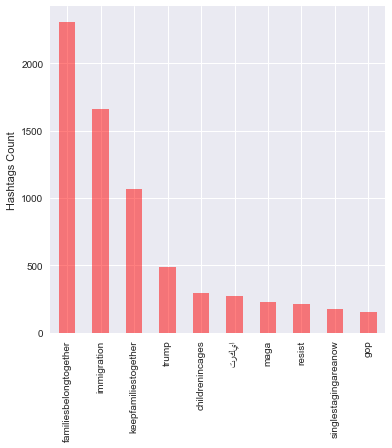

In [221]:
plt.subplots(figsize=(6, 6))
hashtags_df.Count[hashtags_df['Count']>150].plot.bar( align='center', color='red', alpha=0.5)
y_pos = np.arange(len(ht_labels))
plt.xticks(y_pos, ht_labels)
plt.ylabel('Hashtags Count')

### We can see a new tweet with hashtag ##turkey in arabic. Apparently, there are issues around the world when everyone seems to focus only in US. Turkey people are trying to get the attention.

In [235]:
tweets_dfall = pd.concat([tweets_df23, tweets_df24, tweets_df25, tweets_df26], axis=0).reset_index(drop=True)

In [240]:
tweets_dfall.head(2).T

,0,1
created_at,2018-06-23 23:59:59,2018-06-23 23:59:58
entities,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'hashtags': [], 'symbols': [], 'user_mentions..."
favorite_count,5,280
favorited,False,False
id,1010673855856349184,1010673853163540480
id_str,921858853167419397,607721548
in_reply_to_screen_name,RepGraceMeng,None
in_reply_to_status_id,1.01058e+18,NaN
in_reply_to_status_id_str,1.01058e+18,NaN
in_reply_to_user_id,1.05113e+09,NaN


In [383]:
tweets_df = tweets_dfall[['id', 'name', 'screen_name', 'location', 'description', 'source',
                         'followers_count', 'retweet_count', 'favorite_count','verified', 'text', 'cleaned_text', 
                          'created_at', 'lang', 'withheld_in_countries', 'possibly_sensitive']]
tweets_df.head().T

,0,1,2,3,4
id,1010673855856349184,1010673853163540480,1010673848541483010,1010673845634830341,1010673844183552000
name,Tay Tay,Lupe Valdez,Joyeta E.Anderson,Stephanie DeClue,Mark Rubello
screen_name,taytay3593,LupeValdez,joyeta_e,sjdeclue62,MarkRubello
location,,"Texas, USA",Florida,"Stover, Missouri","Toronto, ON, Canada"
description,"Wife, mother, FNP.\n 🇺🇸🚂🚃🚃🚃🇺🇸💎🖥",Your next Governor of Texas. Sheriff. Veteran....,"Retired RN, Midwife, Health Visitor, Case Mana...","Staunch Liberal, dog lover, affirmed single, #...",IT Professional. Computer Science/Digital Desi...
source,Twitter for Android,Twitter for iPhone,Twitter Web Client,Twitter for Android,Twitter Web Client
followers_count,3406,16950,1218,48,750
retweet_count,0,87,0,0,0
favorite_count,5,280,0,0,0
verified,False,True,False,False,False


## Tweet term frequency 

In [384]:
import string
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from collections import Counter

In [385]:
tweet_tokenizer = TweetTokenizer()
punct = list(string.punctuation)
stopwords_list = stopwords.words('english') + punct + ['rt','via','...','…','’','—','—:','“']
tf = Counter()

In [386]:
def process_tweets_tokens(text, tokenizer=TweetTokenizer(), stopwords = stopwords_list):
    """ Process the text of a tweet
        - Lowercase
        - Tokenize
        - Stopword removal
        - Digits removal """    
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return([tok for tok in tokens if tok not in stopwords and not tok.isdigit()])

In [387]:
def process_tweets(x):
    twtokens = process_tweets_tokens(x, tokenizer = tweet_tokenizer, stopwords= stopwords_list)
    return(' '.join(twtokens))

In [388]:
for x in tweets_df.cleaned_text:
    tweet_tokens = process_tweets_tokens(x, tokenizer = tweet_tokenizer, stopwords= stopwords_list)
    tf.update(tweet_tokens)

In [389]:
for tag, count in tf.most_common(20):
    print("{}: {}".format(tag, count))

immigration: 28268
trump: 8660
realdonaldtrump: 4733
illegal: 3945
us: 2847
policy: 2825
border: 2790
people: 2479
children: 2148
familiesbelongtogether: 2078
amp: 2011
immigrants: 1876
president: 1745
want: 1596
trumps: 1590
laws: 1540
like: 1490
law: 1476
one: 1474
democrats: 1387


In [392]:
tweets_df['processed_tweets'] = tweets_df['cleaned_text'].apply(process_tweets)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [393]:
tweets_df[['text', 'cleaned_text', 'processed_tweets']].head()

,text,cleaned_text,processed_tweets
0,@RepGraceMeng @realDonaldTrump Do your job. Se...,RepGraceMeng realDonaldTrump Do your job Secur...,repgracemeng realdonaldtrump job secure border...
1,This goes beyond party lines. Separating fami...,This goes beyond party lines Separating famil...,goes beyond party lines separating families be...
2,Analysis | The bottomless vulgarity of Trump’s...,Analysis The bottomless vulgarity of Trump’s ...,analysis bottomless vulgarity trump immigratio...
3,#Immigration #ReuniteFamiliesNow \n#FamilySepa...,Immigration ReuniteFamiliesNow FamilySeparatio...,immigration reunitefamiliesnow familyseparatio...
4,@mikestill @megynkelly Immigration exists in a...,mikestill megynkelly Immigration exists in all...,mikestill megynkelly immigration exists countr...


## WordCloud for most occuring words

In [394]:
from collections import Counter 
# wordcloud in python
from wordcloud import WordCloud, STOPWORDS 

import re 
import string
import nltk # preprocessing text
from textblob import TextBlob

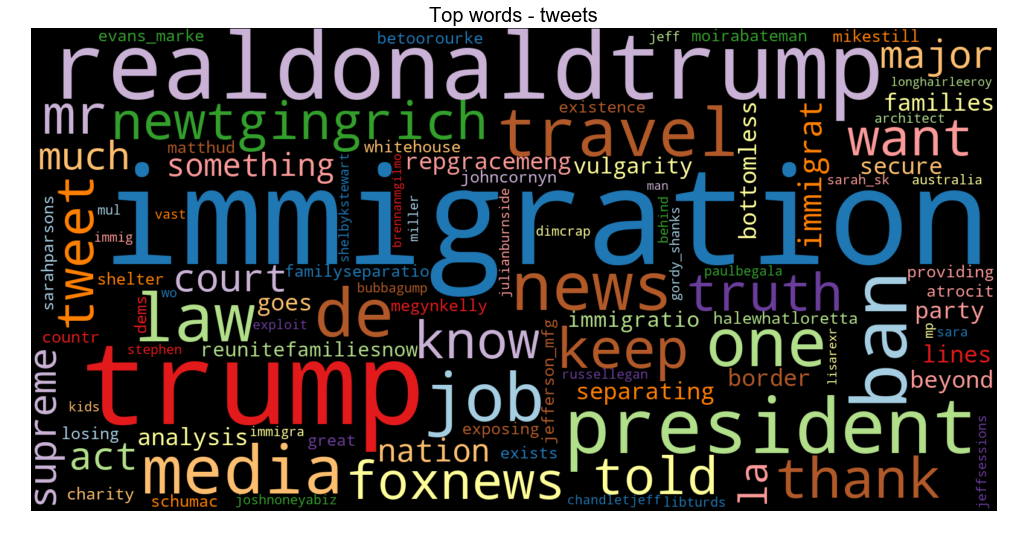

In [395]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100,colormap="Paired", background_color='black',)
wordcloud.generate(str(tweets_df['processed_tweets']))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Top words - tweets", fontsize=20,color='black')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

## Sentiment Analysis - TextBlob 

In [396]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

In [397]:
tweets_df['sentiment'] = tweets_df['processed_tweets'].apply(sentiment)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [398]:
tweets_df[['cleaned_text','processed_tweets', 'sentiment']].head()

,cleaned_text,processed_tweets,sentiment
0,RepGraceMeng realDonaldTrump Do your job Secur...,repgracemeng realdonaldtrump job secure border...,0.4
1,This goes beyond party lines Separating famil...,goes beyond party lines separating families be...,0.0
2,Analysis The bottomless vulgarity of Trump’s ...,analysis bottomless vulgarity trump immigratio...,0.0
3,Immigration ReuniteFamiliesNow FamilySeparatio...,immigration reunitefamiliesnow familyseparatio...,0.0
4,mikestill megynkelly Immigration exists in all...,mikestill megynkelly immigration exists countr...,0.0


In [399]:
tweets_df['senti']=''
tweets_df['senti'][tweets_df['sentiment']>0] = 'positive'
tweets_df['senti'][tweets_df['sentiment']<0] = 'negative'
tweets_df['senti'][tweets_df['sentiment']==0] = 'neutral'

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Anaconda3\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
D:\Anaconda3\lib\site-pack

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


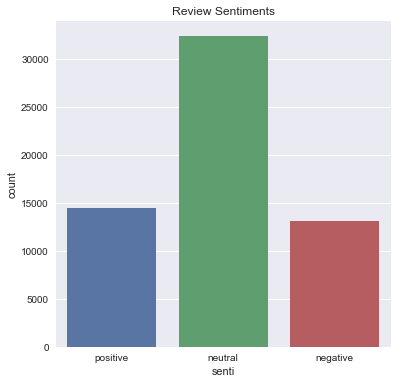

In [400]:
plt.figure(figsize=(6,6))
ax = sns.countplot(tweets_df['senti'])
plt.title('Review Sentiments');

In [402]:
tweets_df_pos = pd.DataFrame(tweets_df['processed_tweets'][tweets_df['senti']=='positive'])
tweets_df_neg = pd.DataFrame(tweets_df['processed_tweets'][tweets_df['senti']=='negative'])
tweets_df_neu = pd.DataFrame(tweets_df['processed_tweets'][tweets_df['senti']=='neutral'])

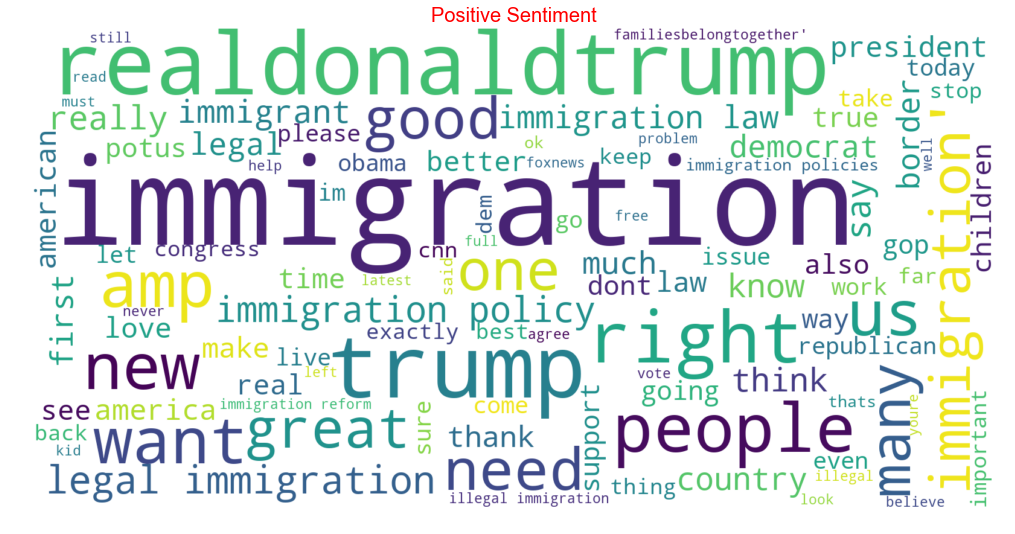

In [403]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100, background_color='white',)
wordcloud.generate(str(set(tweets_df_pos['processed_tweets'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=20,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

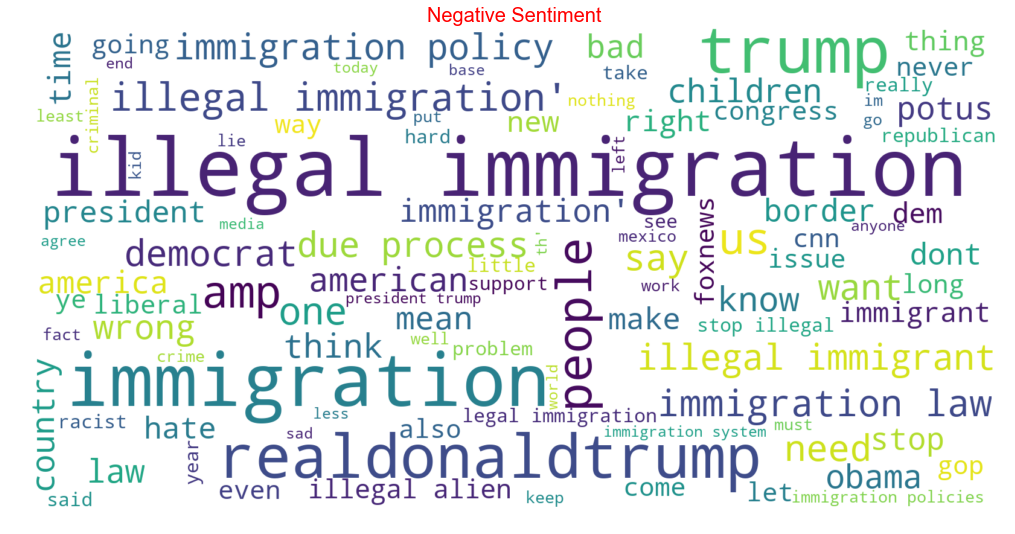

In [404]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100, background_color='white',)
wordcloud.generate(str(set(tweets_df_neg['processed_tweets'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Negative Sentiment", fontsize=20,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

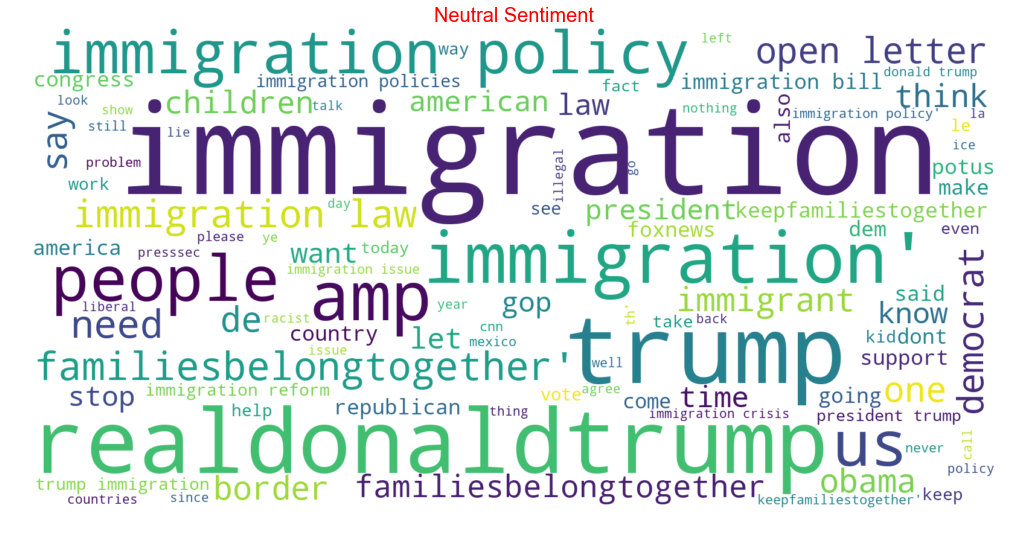

In [405]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100, background_color='white',)
wordcloud.generate(str(set(tweets_df_neu['processed_tweets'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Neutral Sentiment", fontsize=20,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

## Using Vader Sentiment 

In [406]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [407]:
def print_sentiment_scores(tweets):
    vadersenti = analyser.polarity_scores(tweets)
    return pd.Series([vadersenti['pos'], vadersenti['neg'], vadersenti['neu'], vadersenti['compound']])

In [408]:
tweets_df.text[0], tweets_df.text[1]

('@RepGraceMeng @realDonaldTrump Do your job. Secure our borders and immigration reform!!!',
 'This goes beyond party lines.  Separating families betrays our values as Texans, Americans and fellow human beings.… https://t.co/r6UYRzfYM8')

In [409]:
print_sentiment_scores(tweets_df.text[0])

0    0.2470
1    0.0000
2    0.7530
3    0.5067
dtype: float64

In [410]:
tweets_df[['vadersenti_pos', 'vadersenti_neg', 'vadersenti_neu', 'vadersenti_compound']]  = tweets_df['text'].apply(print_sentiment_scores) 

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [411]:
tweets_df[['text', 'senti', 'vadersenti_pos','vadersenti_neg', 'vadersenti_neu','vadersenti_compound']].head(2)

,text,senti,vadersenti_pos,vadersenti_neg,vadersenti_neu,vadersenti_compound
0,@RepGraceMeng @realDonaldTrump Do your job. Se...,positive,0.247,0.000,0.753,0.5067
1,This goes beyond party lines. Separating fami...,neutral,0.226,0.146,0.628,0.2263


In [412]:
tweets_df['vader_senti'] = 'neutral'
tweets_df.loc[tweets_df['vadersenti_compound'] > 0.3 , 'vader_senti'] = 'positive'
tweets_df.loc[tweets_df['vadersenti_compound'] < 0.23 , 'vader_senti'] = 'negative'

tweets_df['vader_possentiment'] = 0
tweets_df.loc[tweets_df['vadersenti_compound'] > 0.3 , 'vader_possentiment'] = 1

tweets_df['vader_negsentiment'] = 0
tweets_df.loc[tweets_df['vadersenti_compound'] <0.23 , 'vader_negsentiment'] = 1

tweets_df['vader_neusentiment'] = 0
tweets_df.loc[(tweets_df['vadersenti_compound'] <=0.3) & (tweets_df['vadersenti_compound'] >=0.23) , 'vader_neusentiment'] = 1

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [413]:
tweets_df[['text', 'senti', 'vader_senti', 'vader_negsentiment', 'vader_possentiment','vadersenti_pos','vadersenti_neg', 'vadersenti_neu','vadersenti_compound']].head(2)

,text,senti,vader_senti,vader_negsentiment,vader_possentiment,vadersenti_pos,vadersenti_neg,vadersenti_neu,vadersenti_compound
0,@RepGraceMeng @realDonaldTrump Do your job. Se...,positive,positive,0,1,0.247,0.000,0.753,0.5067
1,This goes beyond party lines. Separating fami...,neutral,negative,1,0,0.226,0.146,0.628,0.2263


In [414]:
print(tweets_df['text'][5])

@evans_marke @matthud59 @SarahParsons17 @Jefferson_MFG What on Earth is a “soft leave” ? No-one wants to damage our… https://t.co/FcPGm4zrzA


In [415]:
pd.set_option('display.max_columns', None)

In [416]:
print("Positive Tweets:\n")
print(list(tweets_df[tweets_df['vader_senti'] == 'positive'].processed_tweets)[:5])

print("\nNegative Tweets:\n")
print(list(tweets_df[tweets_df['vader_senti'] == 'negative'].processed_tweets)[:5])

print("\nNeutral Tweets:\n")
print(list(tweets_df[tweets_df['vader_senti'] == 'neutral'].processed_tweets)[:5])

Positive Tweets:

['repgracemeng realdonaldtrump job secure borders immigration reform', 'johncornyn existence charity providing shelter teens decades apparently without iss', 'whitehouse great job mr president dems losing black voters years dissing white voters mu', 'realdonaldtrump thank mr president 🇺 🇸 keep work maga ‘ people back taxcuts working', 'trump told one truth immigration media want know']

Negative Tweets:

['goes beyond party lines separating families betrays values texans americans fellow human beings', 'analysis bottomless vulgarity trump immigration politics', 'immigration reunitefamiliesnow familyseparation keepfamiliestogetheract', 'mikestill megynkelly immigration exists countries issue everywherewithout proper immig', 'evans_marke matthud sarahparsons jefferson_mfg earth soft leave ” noone wants damage']

Neutral Tweets:

['halewhatloretta schumac joshnoneyabiz vast multitude mobile wealthy enough pay th', 'hannahvh immilawwde karalynum immcivilrights melenaandra

In [417]:
print(tweets_df.vader_senti.value_counts())

print(tweets_df.vader_senti.value_counts(normalize=True) * 100)

negative    47124
positive    11385
neutral      1491
Name: vader_senti, dtype: int64
negative    78.540
positive    18.975
neutral      2.485
Name: vader_senti, dtype: float64


D:\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


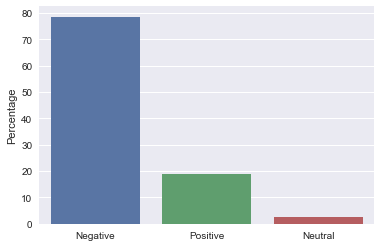

In [419]:
fig, ax = plt.subplots(figsize=(6, 4))

counts = tweets_df.vader_senti.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Positive', 'Neutral'])
ax.set_ylabel("Percentage")

plt.show()
    

## Positive Words

In [420]:
def process_text(text):
    tokens = []
    for line in text:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stopwords_list]
        tokens.extend(toks)
    
    return tokens

In [421]:
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
tokenizer=TweetTokenizer()
stopwords_list = stopwords.words('english') + punct + ['rt','via','...','…','’','—','—:']
pos_lines = list(tweets_df[tweets_df.vader_senti == 'positive'].processed_tweets)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('immigration', 5505),
 ('trump', 1216),
 ('realdonaldtrump', 1151),
 ('like', 832),
 ('us', 590),
 ('policy', 563),
 ('people', 559),
 ('amp', 523),
 ('good', 485),
 ('border', 484),
 ('president', 444),
 ('please', 420),
 ('help', 418),
 ('legal', 416),
 ('want', 412),
 ('support', 412),
 ('great', 394),
 ('children', 384),
 ('would', 379),
 ('country', 342)]

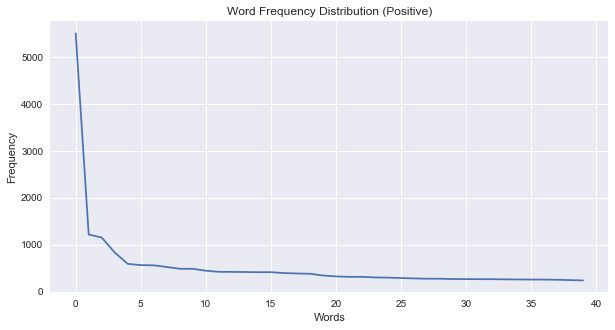

In [422]:
y_val = [x[1] for x in pos_freq.most_common(40)]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

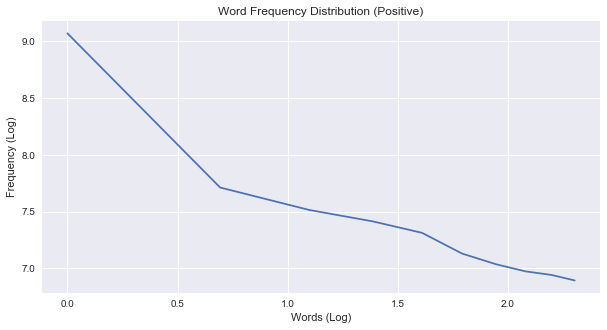

In [423]:
import math
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [424]:
tweets_df_pos = pd.DataFrame(tweets_df[tweets_df.vader_senti == 'positive'].processed_tweets)
tweets_df_neg = pd.DataFrame(tweets_df[tweets_df.vader_senti == 'negative'].processed_tweets)
tweets_df_neu = pd.DataFrame(tweets_df[tweets_df.vader_senti == 'neutral'].processed_tweets)

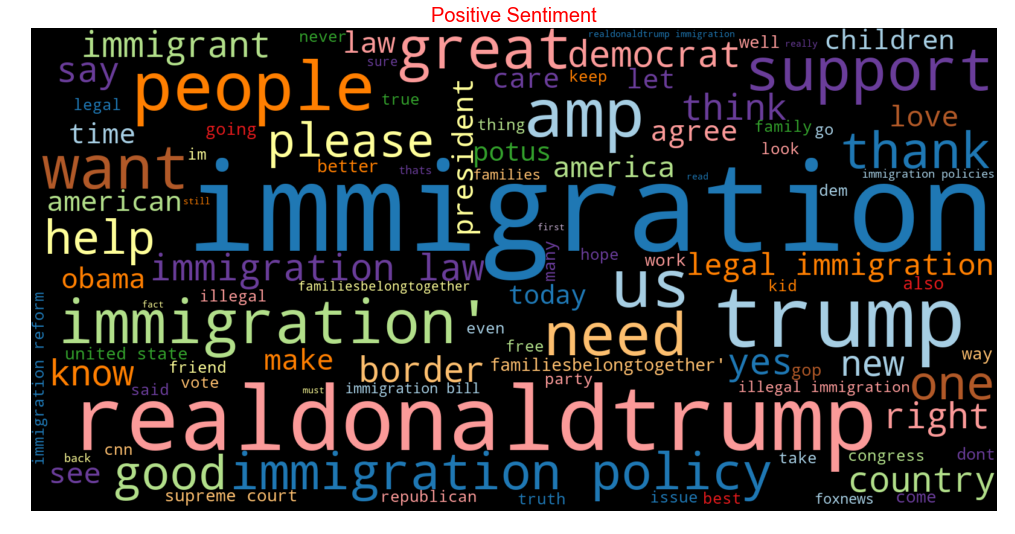

In [425]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100, colormap = 'Paired', background_color='black',)
wordcloud.generate(str(set(tweets_df_pos['processed_tweets'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=20,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

## Negative Words

In [426]:
neg_lines = list(tweets_df[tweets_df.vader_senti == 'negative'].processed_tweets)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(40)

[('immigration', 22001),
 ('trump', 7214),
 ('illegal', 3680),
 ('realdonaldtrump', 3453),
 ('border', 2259),
 ('us', 2164),
 ('policy', 2103),
 ('people', 1854),
 ('familiesbelongtogether', 1731),
 ('children', 1714),
 ('immigrants', 1620),
 ('amp', 1425),
 ('trumps', 1356),
 ('president', 1261),
 ('crisis', 1209),
 ('laws', 1198),
 ('law', 1180),
 ('says', 1124),
 ('obama', 1122),
 ('democrats', 1119),
 ('want', 1096),
 ('one', 1092),
 ('policies', 1052),
 ('stop', 1042),
 ('families', 1006),
 ('gop', 998),
 ('family', 977),
 ('dont', 967),
 ('get', 949),
 ('court', 941),
 ('potus', 910),
 ('”', 900),
 ('open', 894),
 ('need', 873),
 ('de', 866),
 ('‘', 855),
 ('cnn', 851),
 ('legal', 850),
 ('calls', 849),
 ('would', 838)]

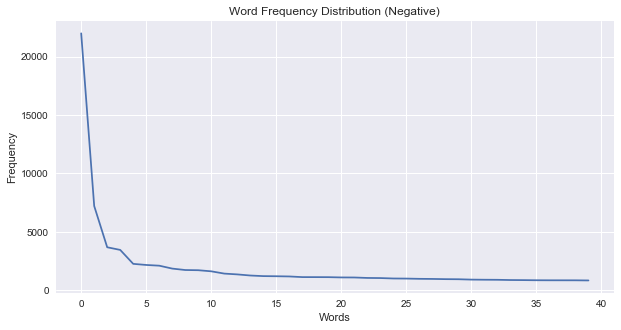

In [427]:
y_val = [x[1] for x in neg_freq.most_common(40)]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

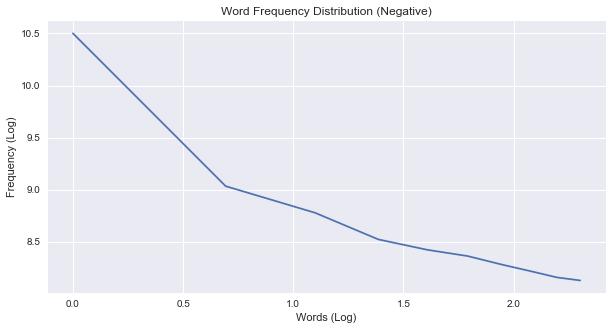

In [428]:
import math
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

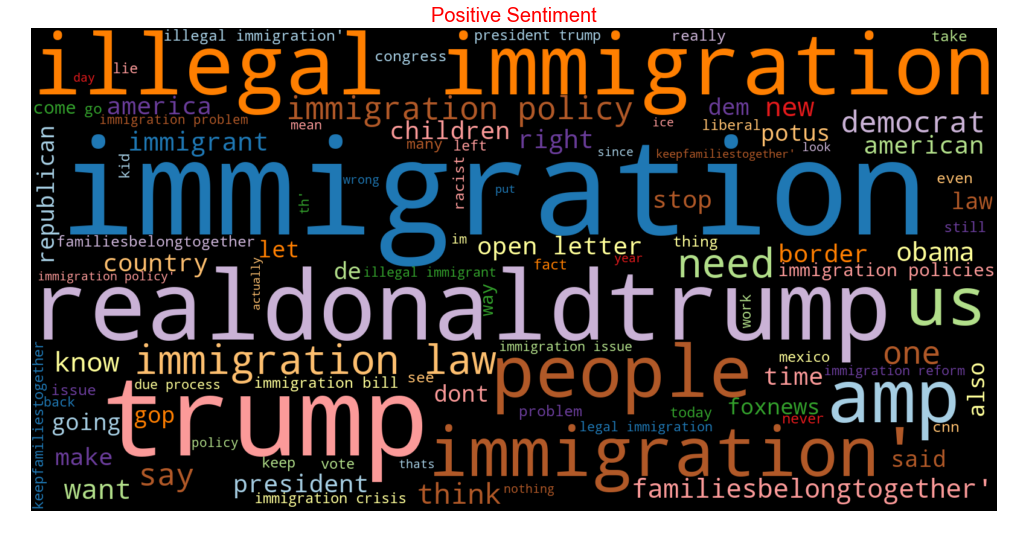

In [429]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100, colormap = 'Paired', background_color='black',)
wordcloud.generate(str(set(tweets_df_neg['processed_tweets'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=20,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

## Neutral Words

In [430]:
neu_lines = list(tweets_df[tweets_df.vader_senti == 'neutral'].processed_tweets)

neu_tokens = process_text(neu_lines)
neu_freq = nltk.FreqDist(neu_tokens)

neu_freq.most_common(20)

[('immigration', 762),
 ('trump', 230),
 ('policy', 159),
 ('realdonaldtrump', 129),
 ('zero', 122),
 ('tolerance', 122),
 ('well', 106),
 ('us', 93),
 ('\x92', 90),
 ('want', 88),
 ('people', 66),
 ('join', 63),
 ('amp', 63),
 ('one', 60),
 ('say', 51),
 ('children', 50),
 ('may', 50),
 ('comprehensive', 48),
 ('know', 48),
 ('says', 48)]

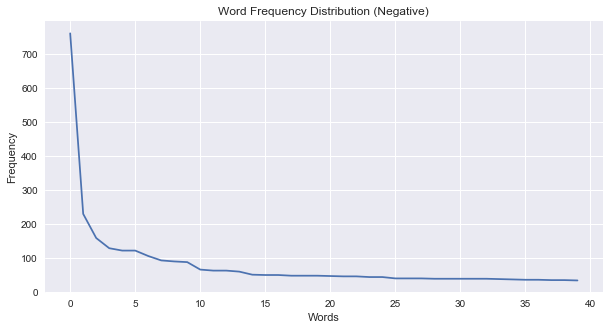

In [431]:
y_val = [x[1] for x in neu_freq.most_common(40)]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

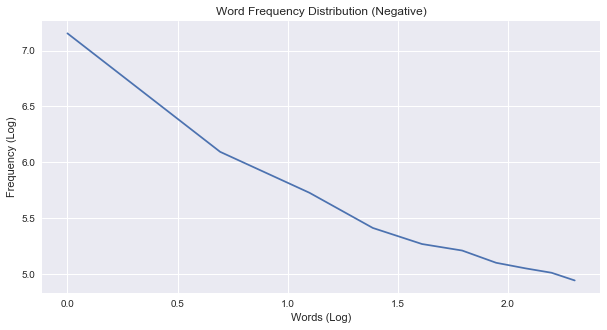

In [432]:
import math
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

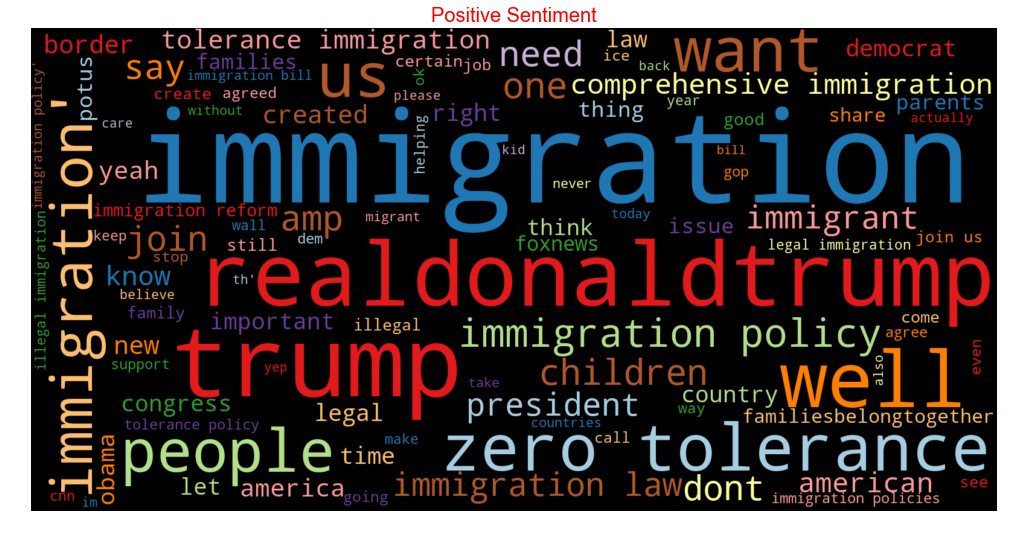

In [433]:
wordcloud = WordCloud(width=1600, height=800, random_state=1, max_words=100, colormap = 'Paired', background_color='black',)
wordcloud.generate(str(set(tweets_df_neu['processed_tweets'])))
# declare our figure 
plt.figure(figsize=(20,10))
plt.title("Positive Sentiment", fontsize=20,color='Red')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
plt.show()

## Most favorited and retweeted tweet 

In [434]:
fav_max = np.max(tweets_df['favorite_count'])
rt_max  = np.max(tweets_df['retweet_count'])

fav = tweets_df[tweets_df.favorite_count == fav_max].index[0]
rt  = tweets_df[tweets_df.retweet_count == rt_max].index[0]

In [435]:
print("The tweet with more likes is: \n{}".format(tweets_df['text'][fav]))
print("Number of likes: {}".format(fav_max))
print("Tweeted by: {}".format(tweets_df['name'][fav]))

The tweet with more likes is: 
I just chatted w/ a Republican in #Oklahoma. He told me he’s a gun owner that believes in background checks &amp; said… https://t.co/H2SMoQk4Bf
Number of likes: 48263
Tweeted by: Rep. Eric Swalwell


In [436]:
print("The tweet with more retweets is: \n{}".format(tweets_df['text'][rt]))
print("Number of retweets: {}".format(rt_max))
print("Tweeted by: {}".format(tweets_df['name'][rt]))

The tweet with more retweets is: 
This is what Mr. Trump and Mr. Miller's immigration policy really looks like... https://t.co/hmWY1lSWSd
Number of retweets: 17921
Tweeted by: Michael Avenatti


## Doing a time graph of favorite and retweet frequency

In [438]:
new_df= tweets_df[['id', 'source', 'created_at','text', 'processed_tweets', 'favorite_count','retweet_count','location','senti', 'vader_senti', 'vadersenti_pos', 'vadersenti_neg', 'vadersenti_neu', 'vadersenti_compound']]

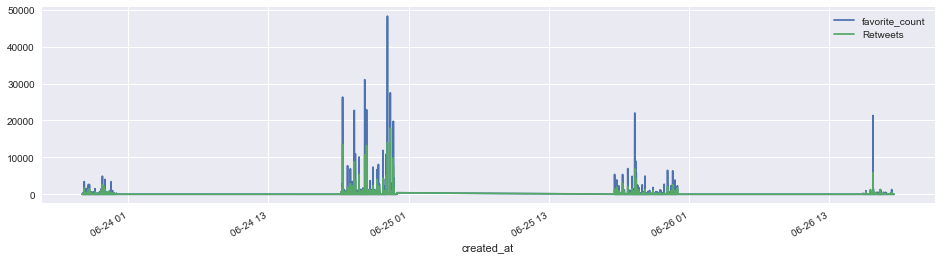

In [439]:
tfav = pd.Series(data=new_df['favorite_count'].values, index=new_df['created_at'])
tfav.plot(figsize=(16,4), label="favorite_count", legend=True)
tret = pd.Series(data=new_df['retweet_count'].values, index=new_df['created_at'])
tret.plot(figsize=(16,4), label="Retweets", legend=True)


## Heatmap

In [440]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [441]:
#Create new columns for year and month based on the shooting date
from datetime import datetime
tweets_df['created_at'] = pd.to_datetime(tweets_df['created_at'])
tweets_df['tweet_year'] = tweets_df['created_at'].dt.year
tweets_df['tweet_month'] = tweets_df['created_at'].dt.month
tweets_df['tweet_date'] = tweets_df['created_at'].dt.day
tweets_df['tweet_time'] = tweets_df['created_at'].dt.time

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [448]:
tweets_sentip = tweets_df[['tweet_year', 'tweet_month', 'tweet_date', 'vader_possentiment' ]].groupby(['tweet_date'], as_index=False).sum().sort_values(by='tweet_date', ascending=False)
tweets_sentin = tweets_df[['tweet_year', 'tweet_month', 'tweet_date', 'vader_negsentiment' ]].groupby(['tweet_date'], as_index=False).sum().sort_values(by='tweet_date', ascending=False)
tweets_sentinn = tweets_df[['tweet_year', 'tweet_month', 'tweet_date', 'vader_neusentiment' ]].groupby(['tweet_date'], as_index=False).sum().sort_values(by='tweet_date', ascending=False)
tweets_sentin

,tweet_date,tweet_year,tweet_month,vader_negsentiment
3,26,20180000,60000,7768
2,25,40360000,120000,15614
1,24,40360000,120000,15643
0,23,20180000,60000,8099


In [443]:
tweeets_sentip = tweets_df[['tweet_year', 'tweet_month', 'tweet_date','tweet_time','vader_possentiment' ]].groupby(['tweet_time'], as_index=False).sum().sort_values(by='tweet_time', ascending=False)
tweeets_sentin = tweets_df[['tweet_year', 'tweet_month', 'tweet_date','tweet_time','vader_negsentiment' ]].groupby(['tweet_time'], as_index=False).sum().sort_values(by='tweet_time', ascending=False)
tweeets_sentinn = tweets_df[['tweet_year', 'tweet_month', 'tweet_date','tweet_time','vader_neusentiment' ]].groupby(['tweet_time'], as_index=False).sum().sort_values(by='tweet_time', ascending=False)

In [449]:
# Create traces
trace0 = go.Scatter(
    x = tweeets_sentip['tweet_date'],
    y = tweeets_sentip['vader_possentiment'],
    mode = 'lines',
    name = 'Vader +ve Sentiment'
)
trace1 = go.Scatter(
    x = tweeets_sentin['tweet_date'],
    y = tweeets_sentin['vader_negsentiment'],
    mode = 'lines',
    name = 'Vader -ve Sentiment'
)
trace2 = go.Scatter(
    x = tweeets_sentinn['tweet_date'],
    y = tweeets_sentinn['vader_neusentiment'],
    mode = 'lines',
    name = 'Vader neutral Sentiment'
)
layout = dict(
  title = 'Vader Sentiment'
)    
data = [trace0, trace1, trace2]
py.iplot({'data': data, 'layout': layout}, filename='Vader Sentiment')

# Latent Dirichlet allocation
Generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. 

In [450]:
import spacy
from spacy.lang.en import English
parser = English()

In [454]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [456]:
en_stop = set(nltk.corpus.stopwords.words('english'))

In [451]:
def lda_tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [453]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

In [455]:
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [460]:
def prepare_text_for_lda(text):
    tokens = lda_tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [498]:
tweets_df['lda'] = tweets_df['cleaned_text'].apply(prepare_text_for_lda)

In [500]:
tweets_df[['cleaned_text', 'lda']].head()

,cleaned_text,lda
0,RepGraceMeng realDonaldTrump Do your job Secur...,"[repgracemeng, realdonaldtrump, secure, border..."
1,This goes beyond party lines Separating famil...,"[beyond, party, line, separate, family, betray..."
2,Analysis The bottomless vulgarity of Trump’s ...,"[analysis, bottomless, vulgarity, trump, immig..."
3,Immigration ReuniteFamiliesNow FamilySeparatio...,"[immigration, reunitefamiliesnow, familysepara..."
4,mikestill megynkelly Immigration exists in all...,"[mikestill, megynkelly, immigration, exist, co..."


tlist = []
for x in tweets_df.lda:
    for elem in x:
        tlist.append(x)

In [504]:
tokens_list = [elem for x in tweets_df.lda for elem in x]
len(tokens_list)

406056

In [505]:
Freq_df = pd.DataFrame(nltk.FreqDist(tokens_list).most_common(100), columns = ['Words', 'Frequency'])

In [506]:
Freq_df.head(10)

,Words,Frequency
0,immigration,28078
1,trump,10216
2,realdonaldtrump,4693
3,policy,4079
4,illegal,3939
5,border,3394
6,child,2714
7,immigrant,2713
8,family,2488
9,people,2469


In [511]:
import gensim
from gensim import corpora
tweet_dict = corpora.Dictionary(tweets_df.lda)
tweet_corpus = [tweet_dict.doc2bow(tweetlda) for tweetlda in tweets_df.lda] #term document matrix

In [512]:
print(list(tweet_dict.token2id.keys())[:50])

['border', 'immigration', 'realdonaldtrump', 'reform', 'repgracemeng', 'secure', 'american', 'being', 'betray', 'beyond', 'family', 'fellow', 'human', 'line', 'party', 'separate', 'texan', 'values', 'analysis', 'bottomless', 'politics', 'trump', 'vulgarity', 'familyseparation', 'keepfamiliestogetheract', 'reunitefamiliesnow', 'country', 'everywherewithout', 'exist', 'immig', 'issue', 'megynkelly', 'mikestill', 'proper', 'damage', 'earth', 'evans_marke', 'jefferson_mfg', 'leave', 'matthud59', 'noone', 'sarahparsons17', 'want', 'apparently', 'charity', 'decade', 'existence', 'johncornyn', 'provide', 'shelter']


In [514]:
import pickle
pickle.dump(tweet_corpus, open('tweetcorpus.pkl', 'wb'))
tweet_dict.save('tweet_dict.gensim')

In [515]:
ldamodel = gensim.models.ldamodel.LdaModel(tweet_corpus, num_topics = 5, id2word=tweet_dict, passes=15)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.101*"immigration" + 0.047*"trump" + 0.028*"policy" + 0.018*"president"')
(1, '0.046*"immigration" + 0.028*"familiesbelongtogether" + 0.009*"letter" + 0.007*"issue"')
(2, '0.013*"immigration" + 0.012*"uphold" + 0.008*"asylum" + 0.006*"divide"')
(3, '0.043*"immigration" + 0.029*"child" + 0.020*"family" + 0.013*"separate"')
(4, '0.064*"immigration" + 0.028*"trump" + 0.023*"court" + 0.016*"illegal"')


In [516]:
ldamodel = gensim.models.ldamodel.LdaModel(tweet_corpus, num_topics = 3, id2word=tweet_dict, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.107*"immigration" + 0.021*"trump" + 0.021*"policy" + 0.015*"border"')
(1, '0.020*"familiesbelongtogether" + 0.019*"country" + 0.009*"keepfamiliestogether" + 0.007*"letter"')
(2, '0.047*"immigration" + 0.033*"trump" + 0.016*"child" + 0.015*"family"')


In [517]:
ldamodel = gensim.models.ldamodel.LdaModel(tweet_corpus, num_topics = 10, id2word=tweet_dict, passes=15)
ldamodel.save('model10.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.056*"immigration" + 0.028*"trump" + 0.026*"crisis" + 0.024*"border"')
(1, '0.067*"immigration" + 0.030*"travel" + 0.016*"support" + 0.015*"problem"')
(2, '0.021*"immigration" + 0.018*"muslim" + 0.010*"rally" + 0.009*"wednesday"')
(3, '0.078*"immigration" + 0.024*"trump" + 0.021*"house" + 0.015*"policy"')
(4, '0.054*"trump" + 0.048*"child" + 0.044*"immigration" + 0.034*"family"')
(5, '0.077*"immigration" + 0.032*"trump" + 0.020*"congress" + 0.017*"uphold"')
(6, '0.048*"immigration" + 0.041*"familiesbelongtogether" + 0.017*"letter" + 0.016*"policy"')
(7, '0.018*"potus" + 0.016*"realdonaldtrump" + 0.015*"presssec" + 0.009*"marcorubio"')
(8, '0.085*"immigration" + 0.035*"illegal" + 0.026*"country" + 0.023*"american"')
(9, '0.096*"immigration" + 0.025*"court" + 0.024*"supreme" + 0.021*"trump"')


# Visualizing Topics

In [519]:
dictionary = gensim.corpora.Dictionary.load('tweet_dict.gensim')
corpus = pickle.load(open('tweetcorpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [520]:
import pyLDAvis.gensim

D:\Anaconda3\lib\json\encoder.py:199: DeprecationWarning:

Interpreting naive datetime as local 2018-06-28 12:55:55.651197. Please add timezone info to timestamps.



In [521]:
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

D:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




D:\Anaconda3\lib\json\encoder.py:199: DeprecationWarning:

Interpreting naive datetime as local 2018-06-28 12:56:00.705918. Please add timezone info to timestamps.



In [522]:
lda_display = pyLDAvis.gensim.prepare(gensim.models.ldamodel.LdaModel.load('model10.gensim'), corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

D:\Anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False




D:\Anaconda3\lib\json\encoder.py:199: DeprecationWarning:

Interpreting naive datetime as local 2018-06-28 13:04:12.278560. Please add timezone info to timestamps.



# Categorization of Tweets
# Who has Tweeted more

In [528]:
tweets_df['protests'] = np.where(tweets_df['lda'].str.contains(("protest|demonstration|strike"), flags = re.IGNORECASE), 1, 0)

D:\Anaconda3\lib\json\encoder.py:199: DeprecationWarning:

Interpreting naive datetime as local 2018-06-28 13:18:48.754001. Please add timezone info to timestamps.



In [530]:
tweets_df[['lda','protests']]

,lda,protests
0,"[repgracemeng, realdonaldtrump, secure, border...",1
1,"[beyond, party, line, separate, family, betray...",1
2,"[analysis, bottomless, vulgarity, trump, immig...",1
3,"[immigration, reunitefamiliesnow, familysepara...",1
4,"[mikestill, megynkelly, immigration, exist, co...",1
5,"[evans_marke, matthud59, sarahparsons17, jeffe...",1
6,"[johncornyn, existence, charity, provide, shel...",1
7,"[betoorourke, moirabateman, expose, atrocity, ...",1
8,"[whitehouse, great, president, lose, black, vo...",1
9,"[halewhatloretta, schumac8, joshnoneyabiz, mul...",1


D:\Anaconda3\lib\json\encoder.py:199: DeprecationWarning:

Interpreting naive datetime as local 2018-06-28 13:19:14.192654. Please add timezone info to timestamps.



In [579]:
#tweets_df = tweets_df.drop(['protests','category','immigration'], 1)

D:\Anaconda3\lib\json\encoder.py:199: DeprecationWarning:

Interpreting naive datetime as local 2018-06-28 15:22:03.408477. Please add timezone info to timestamps.



In [588]:
tweets_df['protests'] = np.where(tweets_df['lda'].astype('str').str.contains('protest|demonstration|strike|fight', flags = re.IGNORECASE), 1, 0)
tweets_df['children'] = np.where(tweets_df['lda'].astype('str').str.contains('child|girl|boy|infant|baby|babies|family|families', flags = re.IGNORECASE), 1, 0)
tweets_df['government'] = np.where(tweets_df['lda'].astype('str').str.contains('politic|government|election|bill|trump|realdonaldtrump|policy', flags = re.IGNORECASE), 1, 0)
tweets_df['immigration'] = np.where(tweets_df['lda'].astype('str').str.contains('immigrant|immigration|immigrate|move|moving|travel|travelban|border|illegal', flags = re.IGNORECASE), 1, 0)

D:\Anaconda3\lib\json\encoder.py:199: DeprecationWarning:

Interpreting naive datetime as local 2018-06-28 15:28:11.011799. Please add timezone info to timestamps.



In [589]:
tweets_df.protests.sum(), tweets_df.government.sum(), tweets_df.children.sum(), tweets_df.immigration.sum()

(1500, 19428, 8946, 34120)

D:\Anaconda3\lib\json\encoder.py:199: DeprecationWarning:

Interpreting naive datetime as local 2018-06-28 15:28:16.479640. Please add timezone info to timestamps.

